In [95]:
%load_ext autoreload
%autoreload 2

import glob, os, sys

import matplotlib.pyplot as plt
import pickle 
import numpy as np

import seaborn as sns

plt.rcParams.update({'font.size': 13})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
with open("FiguresData/scalings.pkl", "rb") as file:
    raq,fkt,fkp,u_mi,u_ma,v_mi,v_ma,p_mi,p_ma,V_mi,V_ma,T_mi,T_ma,dt_mi,dt_ma = pickle.load(file)

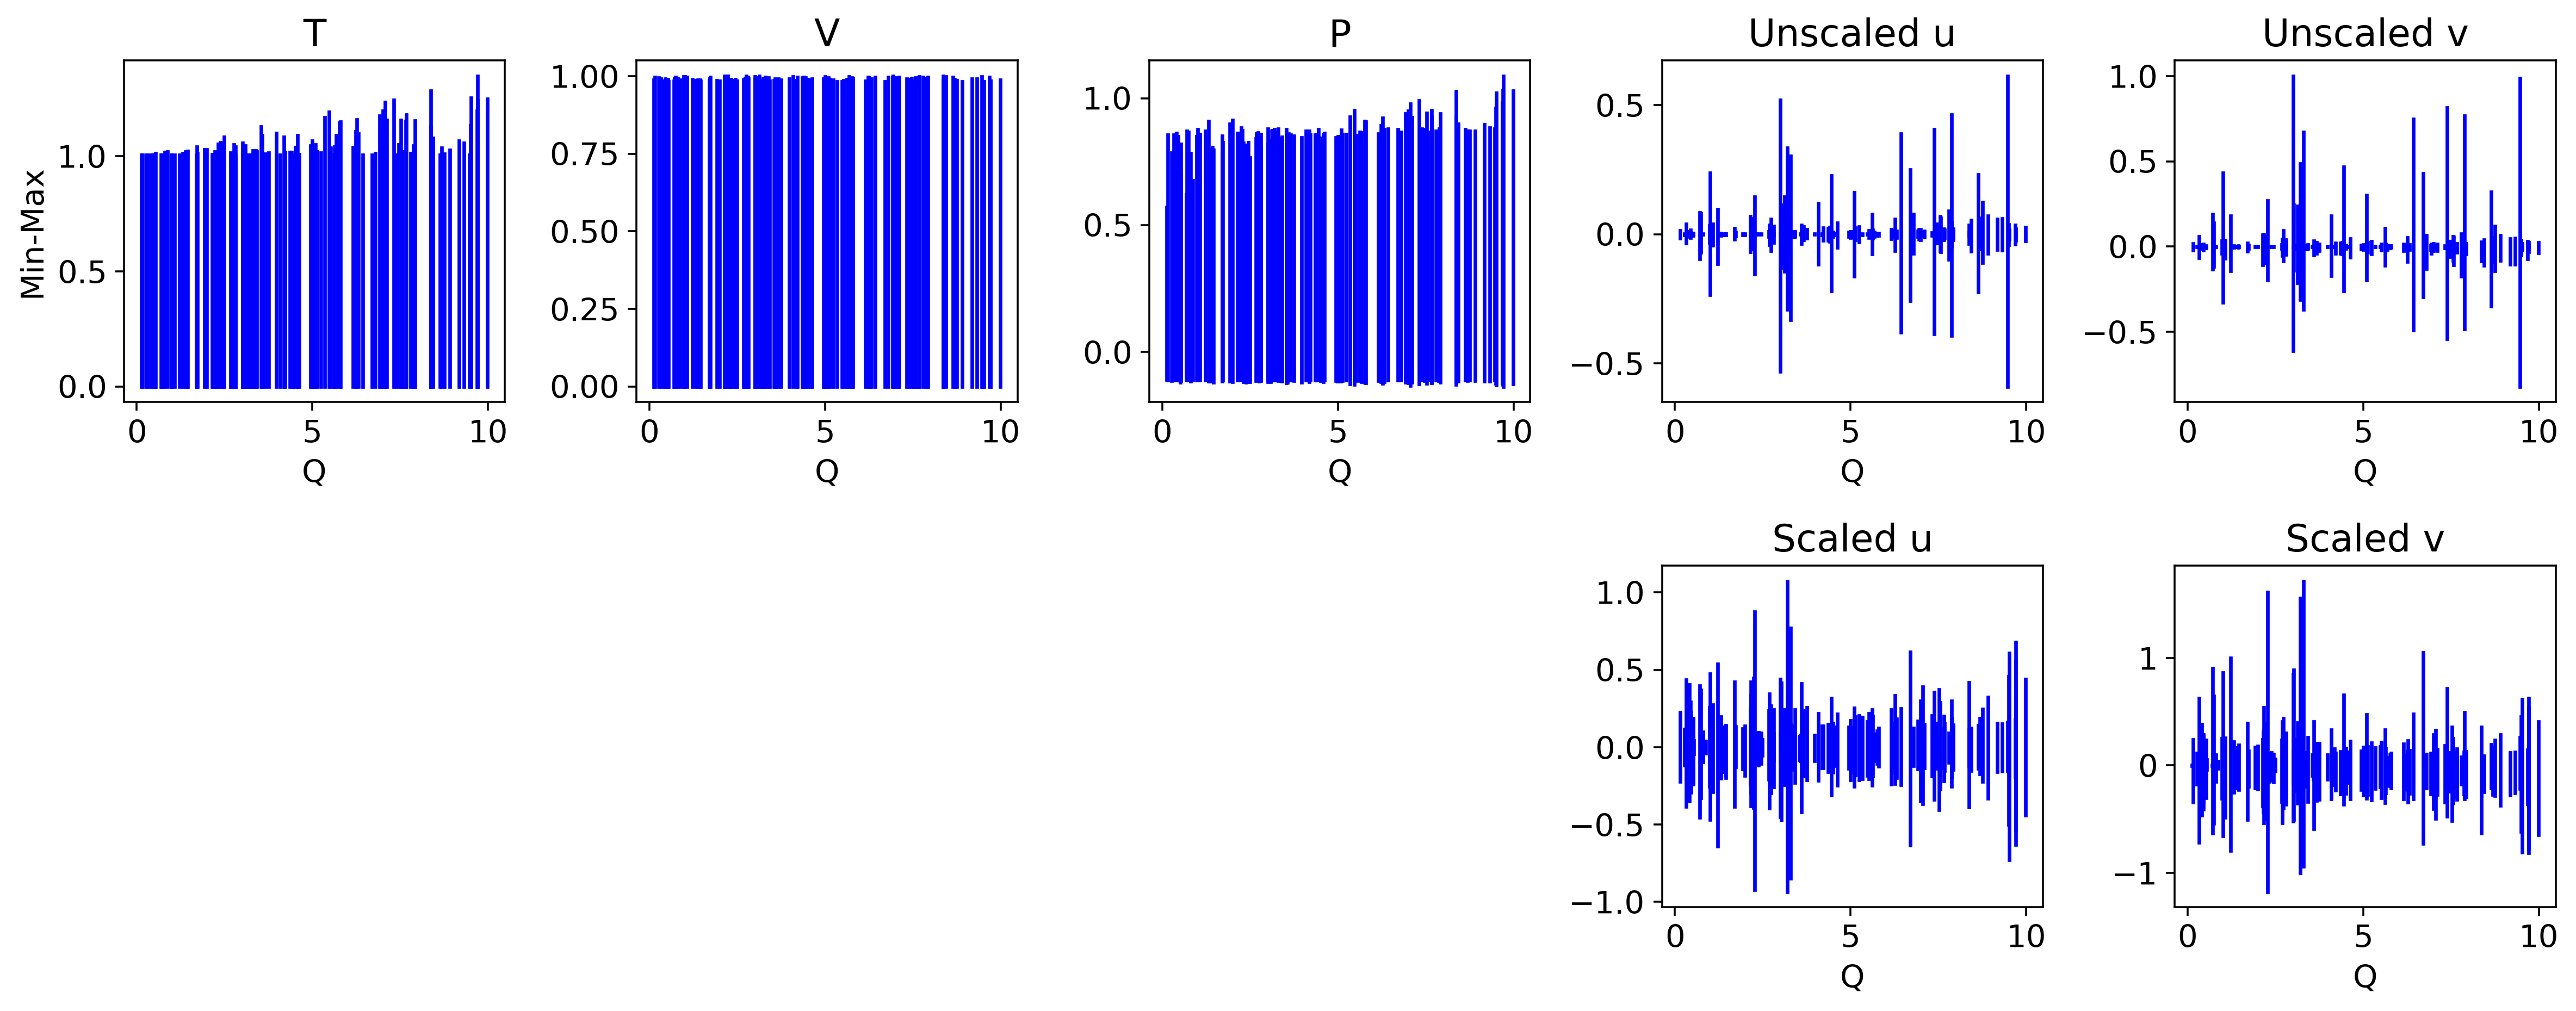

In [109]:
u_scaler = np.exp((raq/10)*1.80167667 + np.log(fkt)*0.4330392 + np.log(fkp)*-0.46052953 )*5 
v_scaler = np.exp((raq/10)*1.80167667 + np.log(fkt)*0.4330392 + np.log(fkp)*-0.46052953 )*5 

u_mas = u_ma/u_scaler
u_mis = u_mi/u_scaler
v_mas = v_ma/v_scaler
v_mis = v_mi/v_scaler

#uv_std = np.max(np.abs([u_mi, u_ma, v_mi, v_ma])) - np.min(np.abs([u_mi, u_ma, v_ma, v_ma]))
    
fig = plt.figure(figsize=(15,6),dpi=320)       

ax = fig.add_subplot(2,5,1)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [T_mi[i], T_ma[i]], 'b-')
ax.set_xlabel("Q")
ax.set_title("T")
ax.set_ylabel("Min-Max")

ax = fig.add_subplot(2,5,2)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [V_mi[i], V_ma[i]], 'b-')
ax.set_xlabel("Q")
ax.set_title("V")

ax = fig.add_subplot(2,5,3)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [p_mi[i], p_ma[i]], 'b-')
ax.set_xlabel("Q")
ax.set_title("P")

ax = fig.add_subplot(2,5,4)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [u_mi[i]/uv_std, u_ma[i]/uv_std], 'b-')
ax.set_xlabel("Q")
ax.set_title("Unscaled u")
        
ax = fig.add_subplot(2,5,5)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [v_mi[i]/uv_std, v_ma[i]/uv_std], 'b-')
ax.set_xlabel("Q")
ax.set_title("Unscaled v")   

ax = fig.add_subplot(2,5,9)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [u_mis[i], u_mas[i]], 'b-')
ax.set_xlabel("Q")
ax.set_title("Scaled u")

ax = fig.add_subplot(2,5,10)
for i in range(len(raq)):
    ax.plot([raq[i], raq[i]], [v_mis[i], v_mas[i]], 'b-')
ax.set_xlabel("Q")
ax.set_title("Scaled v")

plt.tight_layout()
plt.savefig("scalings.pdf")
plt.show()